Notebook to compare model nowcasts with data from a few ONC moorings. Really, only the JDF AS04 has data overlapping data.

Observations are from Ocean Networks Canada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ONC
from salishsea_tools import tidetools, viz_tools
import netCDF4 as nc
import datetime
from scipy import interpolate as interp

from nowcast import analyze

%matplotlib inline


In [2]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               'JuandeFucaStrait_AS04Mooring_CTD_20131011T230027Z_20161027T212203Z-NaN_clean.csv')


In [3]:
grid_B = {'nowcast': nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc'),
          'nowcast-green': nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')}
result_homes = {'nowcast': '/results/SalishSea/nowcast/',
                'nowcast-green': '/results/SalishSea/nowcast-green/'}

# Strait of Juan de Fuca - AS04

## Daily Averages - nowcast
Options for hourly averages exist

In [4]:
sdt=datetime.datetime(2014, 11, 1)
edt = datetime.datetime(2016, 10, 28)

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 117.0
Model bathymetry: 117.0


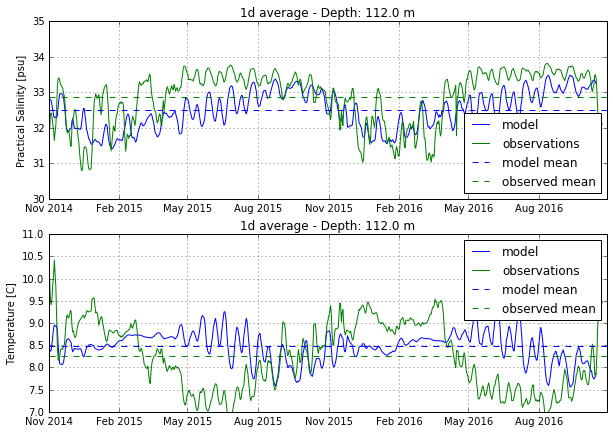

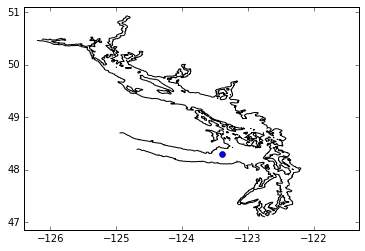

In [5]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast'], result_homes['nowcast'], 
                                    period='1d', smin=30, smax=35, tmin=7, tmax=11, interp=True)

## Nowcast-green

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 141.625
Model bathymetry: 141.625


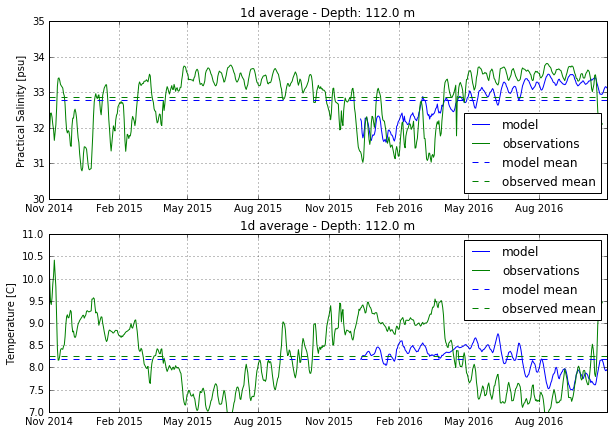

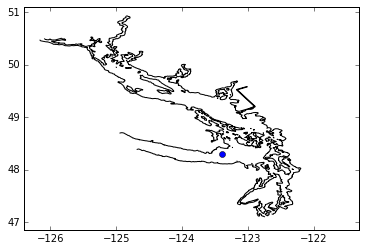

In [6]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast-green'], 
                                    result_homes['nowcast-green'], period='1d', 
                                    smin=30, smax=35, tmin=7, tmax=11, interp=True, teos_to_psu=True)

# Boundary Pass

In [7]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/BoundaryPass//'
               'BoundaryPass_BoundaryPassMooring_CTD_20130418T192032Z_20161021T231158Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2016,11,11)

## Nowcast

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 205.0
Model bathymetry: 205.0


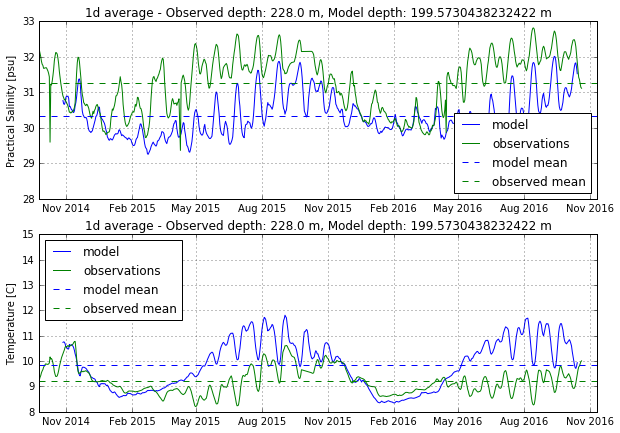

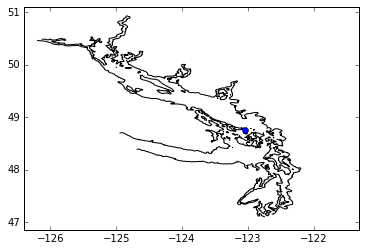

In [8]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast'], result_homes['nowcast'], 
                                    period='1d', 
                                    interp=False, smin=28, smax=33, tmin=8, tmax=15)

* Mooring is about 30 m deeper than the model bathymetry at this location. So, I can't interpolate to this depth since it is outside of the model depth range. 
* Our daily 'fresh/warm pulses' look good - about the right amplitude and timing. Maybe a little bit strong in the amplitude.   
* On average, we are too fresh (~1psu) and too warm (~1degC). But, we are also 30 m higher in depth. 
* These comparisons are at the very start of our nowcasts. Unfortunately, we don't have any more recent data.

## Nowcast-green

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 231.625
Model bathymetry: 231.625


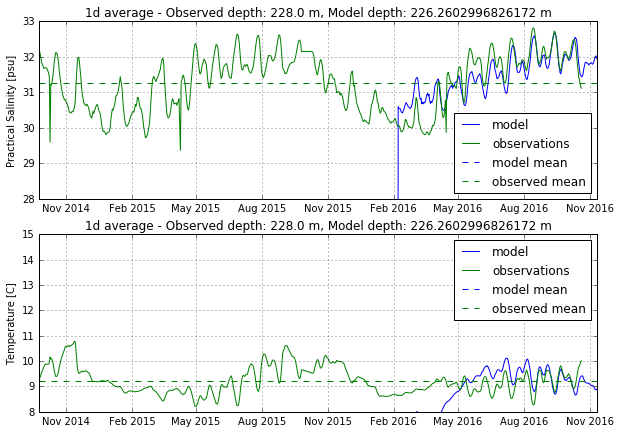

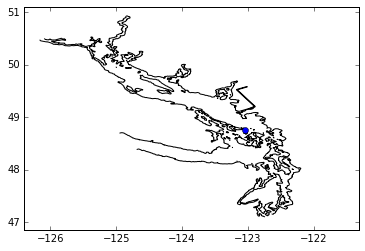

In [9]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast-green'], 
                                    result_homes['nowcast-green'], 
                                    period='1d', 
                                    interp=False, smin=28, smax=33, tmin=8, tmax=15, teos_to_psu=True)

Improvement in nowcast green could be because this grid point is 27 m deeper now. 

# JFCN

In [10]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               'JuandeFucaStrait_JFCNMooring_CTD_20131025T180034Z_20150911T234539Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2015,9,12)

## Nowcast

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 234.375
Model bathymetry: 234.375


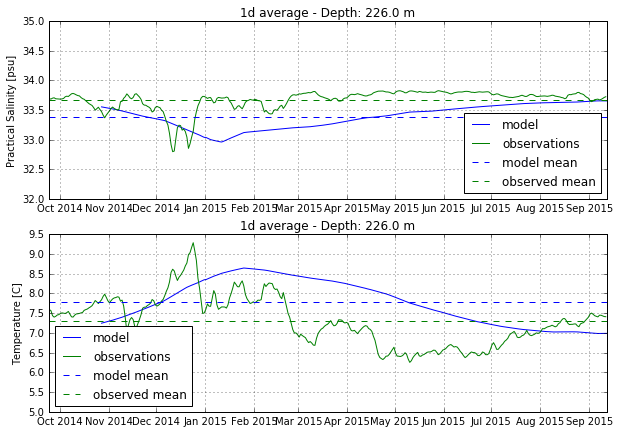

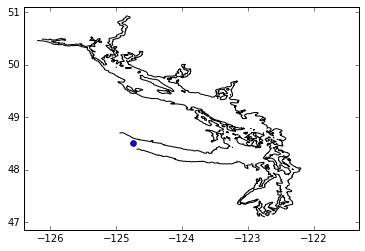

In [11]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast'], result_homes['nowcast'], 
                                    period='1d',
                                    interp=True, smin=32, smax=35, tmin=5, tmax=9.5)

# Macaulay

In [12]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               'JuandeFucaStrait_MacaulayOutfallMooring_CTD_20140417T173026Z_20161026T235626Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2016,10,27)

## Nowcast

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 55.0
Model bathymetry: 55.0


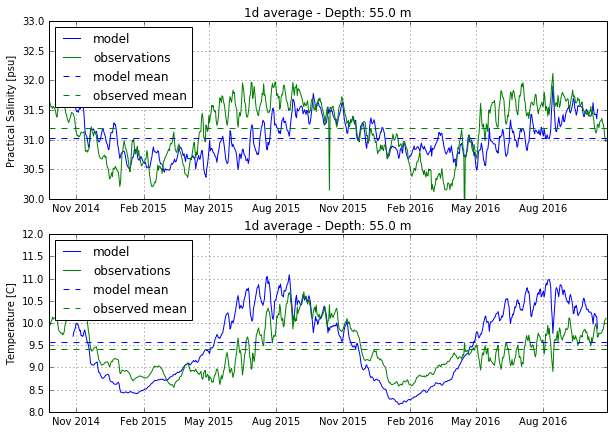

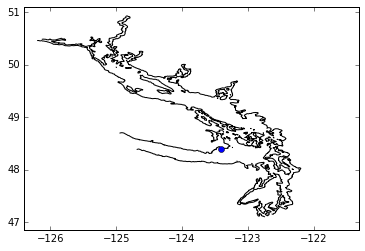

In [13]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast'], result_homes['nowcast'], 
                                    period='1d', interp=True,smin=30, smax=33, tmin=8, tmax=12)

## Nowcast-green

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 71.125
Model bathymetry: 71.125


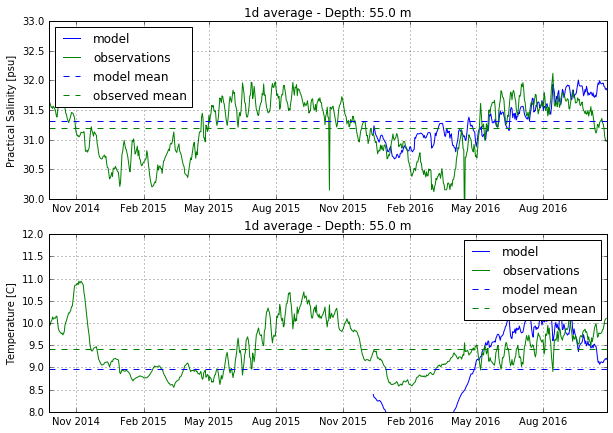

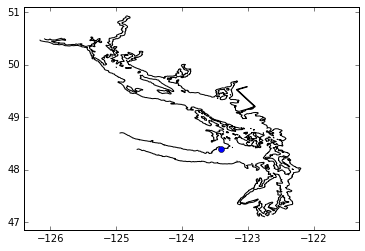

In [14]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B['nowcast-green'], 
                                    result_homes['nowcast-green'], 
                                    period='1d', interp=True,smin=30, smax=33, tmin=8, tmax=12,
                                    teos_to_psu=True)